In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
%config IPCompleter.greedy=True

In [2]:
def make_meshgrid(x, y, h=.02, margin=1):
    x_min, x_max = x.min() - margin, x.max() + margin
    y_min, y_max = y.min() - margin, y.max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape)
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
def plot_svc(ax, svc, X, y, title):
    x1, x2 = (X.iloc[:, 0], X.iloc[:, 1])
    print(x1.shape, x2.shape)
    xx, yy = make_meshgrid(x1, x2, margin=margin)
    print(xx.shape, yy.shape)
    
    plot_contours(ax, svc, xx, yy, cmap=plt.cm.RdYlGn, alpha=0.8)
    ax.scatter(x1, x2, c=y, cmap=plt.cm.RdYlGn, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X 1')
    ax.set_ylabel('X 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# **A**

In [4]:
a_train = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_a.txt', delimiter='\t').replace({'red': 0, 'green': 1})
a_X_train = a_train.drop('Color', axis=1)
a_y_train = a_train.Color

a_test = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_a_test.txt', delimiter='\t').replace({'red': 0, 'green': 1})
a_X_test = a_test.drop('Color', axis=1)
a_y_test = a_test.Color

In [5]:
a_X_train.size

80

In [6]:
svc = SVC(kernel='linear')
svc.fit(a_X_train, a_y_train)

SVC(kernel='linear')

(40,) (40,)
(100, 91) (100, 91)
(9100,)
(100, 91)
(40,) (40,)
(101, 111) (101, 111)
(11211,)
(101, 111)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


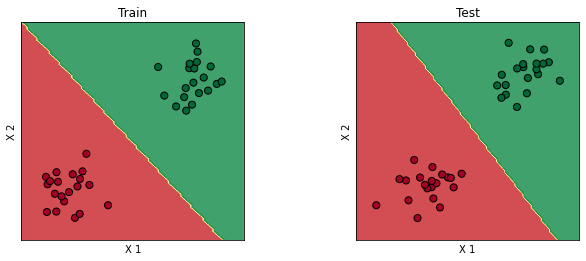

In [7]:
margin = 0.2
plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plot_svc(plt.subplot(1, 2, 1), svc, a_X_train, a_y_train, 'Train')
plot_svc(plt.subplot(1, 2, 2), svc, a_X_test, a_y_test, 'Test')

In [8]:
print("Support vectors number \nclass 'red':", svc.n_support_[0], 
     "\nclass 'green':", svc.n_support_[1])

Support vectors number 
class 'red': 3 
class 'green': 3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, TEST')

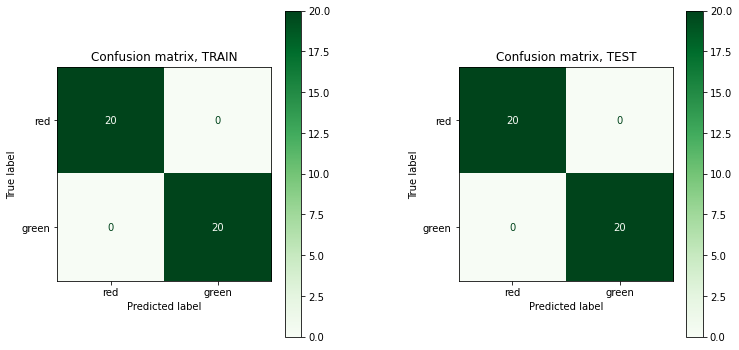

In [9]:
a_y_pred = svc.predict(a_X_test)

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax = plt.subplot(1, 2, 1)
disp = plot_confusion_matrix(svc, a_X_train, a_y_train, display_labels=['red', 'green'], cmap=plt.cm.Greens, ax=ax)
disp.ax_.set_title('Confusion matrix, TRAIN')
ax = plt.subplot(1, 2, 2)
disp = plot_confusion_matrix(svc, a_X_test, a_y_test, display_labels=['red', 'green'], cmap=plt.cm.Greens, ax=ax)
disp.ax_.set_title('Confusion matrix, TEST')

# **B**

In [10]:
b_train = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_b.txt', delimiter='\t').replace({'red': 0, 'green': 1})
b_X_train = b_train.drop('Colors', axis=1)
b_y_train = b_train.Colors

b_test = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_b_test.txt', delimiter='\t').replace({'red': 0, 'green': 1})
b_X_test = b_test.drop('Colors', axis=1)
b_y_test = b_test.Colors

In [11]:
opt_C = [1, 1]
opt_score = [0.0, 0.0]
for C in range(1, 1000):
    svc = SVC(C=C, kernel='linear')
    svc.fit(b_X_train, b_y_train)
    
    train_score = svc.score(b_X_train, b_y_train)
    if (train_score > opt_score[0]):
        opt_score[0] = train_score
        opt_C[0] = C
        
    test_score = svc.score(b_X_test, b_y_test)
    if (test_score > opt_score[1]):
        opt_score[1] = test_score
        opt_C[1] = C

In [12]:
print('train_score =', opt_score[0], ', C =', opt_C[0],
      '\ntest_score =', opt_score[1], ', C =', opt_C[1])

train_score = 1.0 , C = 483 
test_score = 1.0 , C = 1


In [14]:
svc = SVC(kernel='linear')
grid_search_cv_clf = GridSearchCV(svc, {'C': range(1, 1000)}, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(b_X_train, b_y_train)
grid_search_cv_clf.best_params_

{'C': 1}

In [15]:
print(grid_search_cv_clf.best_estimator_.score(b_X_train, b_y_train))
print(grid_search_cv_clf.best_estimator_.score(b_X_test, b_y_test))

0.98
1.0


# **C**

In [16]:
c_train = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_c.txt', delimiter='\t').replace({'red': 0, 'green': 1})
c_X_train = c_train.drop('Colors', axis=1)
c_y_train = c_train.Colors

c_test = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_c_test.txt', delimiter='\t').replace({'red': 0, 'green': 1})
c_X_test = c_test.drop('Colors', axis=1)
c_y_test = c_test.Colors

(50,) (50,)
(231, 271) (231, 271)
(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)
(62601,)
(231, 271)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)
(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)
(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)
(50,) (50,)
(231, 271) (231, 271)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)
(60180,)
(255, 236)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(50,) (50,)
(231, 271) (231, 271)
(62601,)
(231, 271)
(50,) (50,)
(255, 236) (255, 236)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(60180,)
(255, 236)


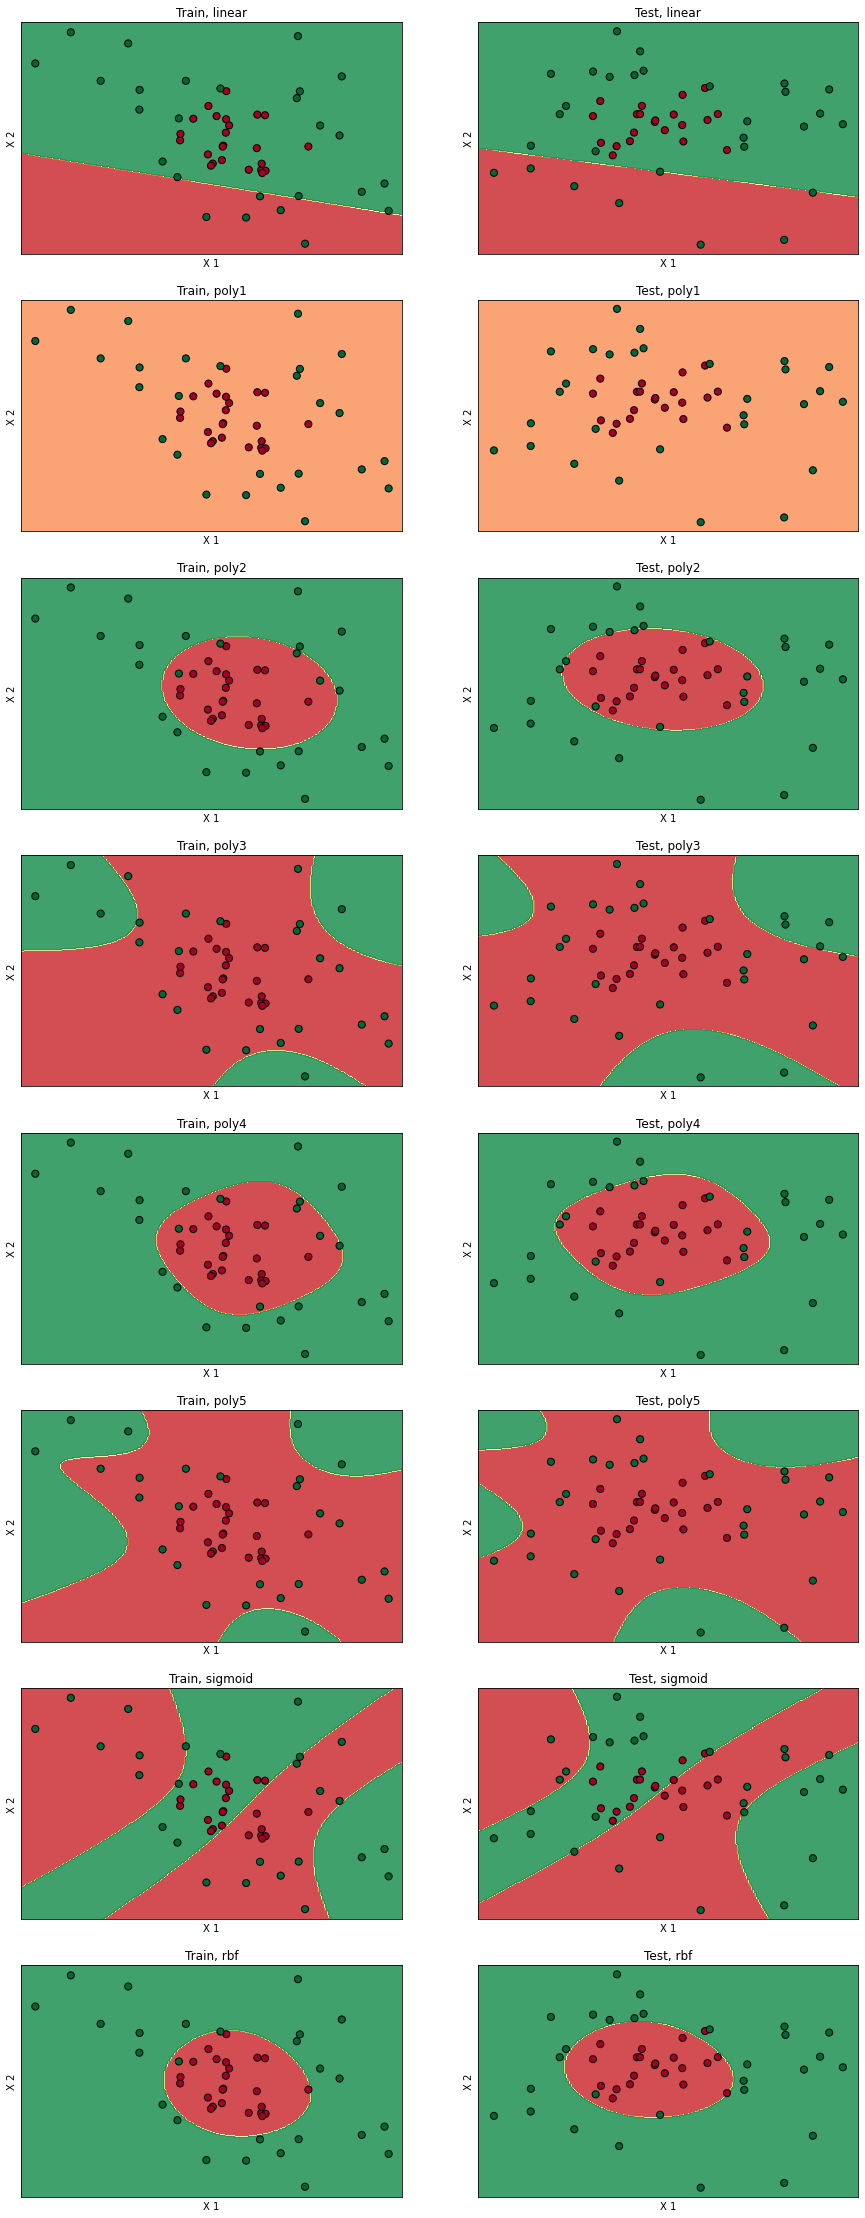

In [17]:
margin = 0.2
plt.figure(figsize=(15, 40))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

kernels = [['linear', 0], ['poly', 1], ['poly', 2], ['poly', 3],
           ['poly', 4], ['poly', 5], ['sigmoid', 0], ['rbf', 0]]

for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel[0], degree=kernel[1])
    svc.fit(c_X_train, c_y_train)
    
    if (kernel[1] != 0):
        title = kernel[0] + str(kernel[1])
    else:
        title = kernel[0]
        
    plot_svc(plt.subplot(8, 2, 2*i+1), svc, c_X_train, c_y_train, 'Train, ' + title)
    plot_svc(plt.subplot(8, 2, 2*i+2), svc, c_X_test, c_y_test, 'Test, ' + title)

In [18]:
svc = SVC(kernel='poly', degree=1)
svc.fit(c_X_train, c_y_train)
print(np.unique(svc.predict(c_X_train)))
print(np.unique(svc.predict(c_X_test)))

[1]
[1]


# **D**

In [19]:
d_train = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_d.txt', delimiter='\t').replace({'red': 0, 'green': 1})
d_X_train = d_train.drop('Colors', axis=1)
d_y_train = d_train.Colors

d_test = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_d_test.txt', delimiter='\t').replace({'red': 0, 'green': 1})
d_X_test = d_test.drop('Colors', axis=1)
d_y_test = d_test.Colors

(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)
(200,) (200,)
(220, 640) (220, 640)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(140800,)
(220, 640)
(200,) (200,)
(218, 633) (218, 633)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(137994,)
(218, 633)


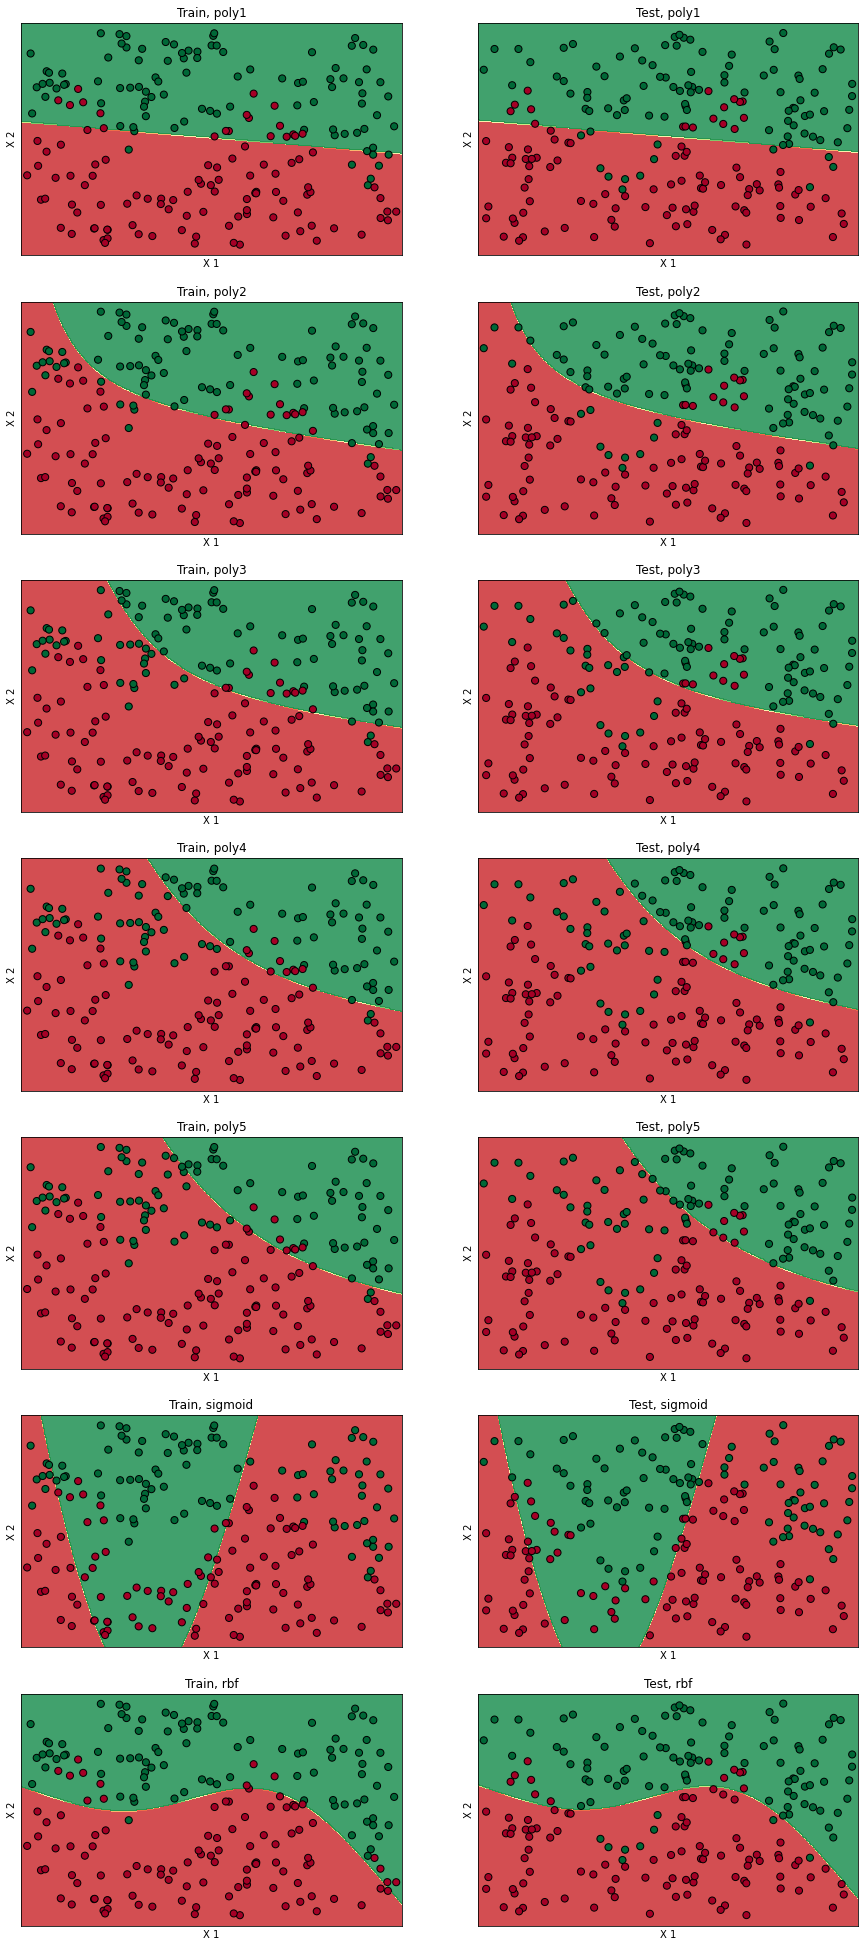

In [20]:
margin = 0.2
plt.figure(figsize=(15, 35))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

kernels = [['poly', 1], ['poly', 2], ['poly', 3], ['poly', 4],
           ['poly', 5], ['sigmoid', 0], ['rbf', 0]]

for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel[0], degree=kernel[1])
    svc.fit(d_X_train, d_y_train)
    
    if (kernel[1] != 0):
        title = kernel[0] + str(kernel[1])
    else:
        title = kernel[0]
        
    plot_svc(plt.subplot(7, 2, 2*i+1), svc, d_X_train, d_y_train, 'Train, ' + title)
    plot_svc(plt.subplot(7, 2, 2*i+2), svc, d_X_test, d_y_test, 'Test, ' + title)

# **E**

In [21]:
e_train = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_e.txt', delimiter='\t').replace({'red': 0, 'green': 1})
e_X_train = e_train.drop('Colors', axis=1)
e_y_train = e_train.Colors

e_test = pd.read_csv('/content/drive/MyDrive/Машинное обучение/svmdata_e_test.txt', delimiter='\t').replace({'red': 0, 'green': 1})
e_X_test = e_test.drop('Colors', axis=1)
e_y_test = e_test.Colors

['rbf', 0] 1000
rbf: gamma = 1000
(120,) (120,)
(119, 120) (119, 120)
(14280,)
(119, 120)
(120,) (120,)
(120, 117) (120, 117)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


(14040,)
(120, 117)


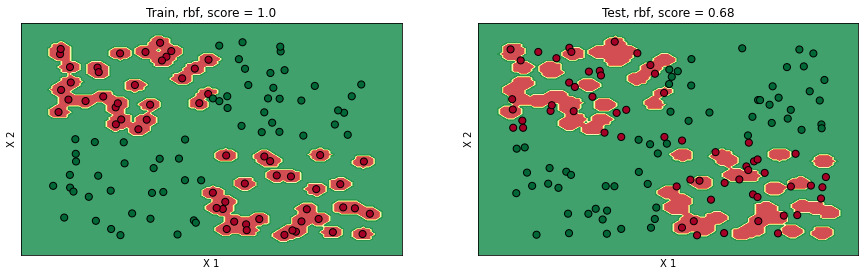

In [22]:
margin = 0.2
plt.figure(figsize=(15, 35))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# kernels = [['poly', 1], ['poly', 2], ['poly', 3], ['poly', 4],
#            ['poly', 5], ['sigmoid', 0], ['rbf', 0]]
kernels = [['rbf', 0]]


for i, kernel in enumerate(kernels):
    best_score = 0
    svc_with_best_train_score = None
    for gamma in np.arange(1000, 1001):
        print(kernel, gamma)
        svc = SVC(kernel=kernel[0], degree=kernel[1], gamma=gamma)
        svc.fit(e_X_train, e_y_train)
        train_score = svc.score(e_X_train, e_y_train)
        if (best_score <= train_score):
            best_score = train_score
            svc_with_best_train_score = svc
        
        # if (best_score == 1.0):
        #     break
    
    if (kernel[1] != 0):
        svc_title = kernel[0] + str(kernel[1])
    else:
        svc_title = kernel[0]
        
    print(svc_title + ': gamma = ' + str(svc_with_best_train_score.gamma))
    
    train_title = svc_title + ', score = ' + str(round(best_score, 2))
    test_title = svc_title + ', score = ' +  str(round(svc_with_best_train_score.score(e_X_test, e_y_test), 2))
        
    plot_svc(plt.subplot(7, 2, 2*i+1), svc_with_best_train_score, e_X_train, e_y_train, 'Train, ' + train_title)
    plot_svc(plt.subplot(7, 2, 2*i+2), svc_with_best_train_score, e_X_test, e_y_test, 'Test, ' + test_title)